In [ ]:
import warnings

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import textwrap


In [ ]:
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/country_vaccinations.csv')
data['date'] = pd.to_datetime(data['date'])
countries = list(data['country'].unique())
vaccines_name = list(data['vaccines'].unique())

data_ld_list = []  # Utilisation d'une liste pour accumuler les DataFrames

for country in countries:
    temp = data[data['country'] == country].reset_index(drop=True)
    temp = temp.iloc[-1, :]  # Prendre la dernière ligne
    data_ld_list.append(temp)  # Ajouter à la liste

# Concaténer tous les DataFrames accumulés
data_ld = pd.concat(data_ld_list, axis=1).T.reset_index(drop=True)

# Filtrer pour enlever le Royaume-Uni si n


In [ ]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


In [ ]:
data.describe()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,45984,2.508400e+04,2.394600e+04,2.104800e+04,2.060000e+04,4.567700e+04,25084.000000,23946.000000,21048.000000,45677.000000
mean,2021-05-28 21:11:35.198329600,2.048794e+07,8.757993e+06,5.583303e+06,2.597850e+05,1.308535e+05,43.740659,26.569498,19.689742,3547.603520
min,2020-12-01 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2021-04-06 00:00:00,2.077678e+05,1.668525e+05,8.035850e+04,4.898000e+03,8.710000e+02,5.270000,4.112500,2.300000,505.000000
50%,2021-06-02 00:00:00,1.459863e+06,9.981035e+05,6.352150e+05,2.410650e+04,6.774000e+03,26.440000,18.600000,10.645000,2191.000000
75%,2021-07-26 00:00:00,7.737194e+06,4.679778e+06,3.270408e+06,1.116888e+05,4.169500e+04,73.442500,46.300000,32.252500,5307.000000
max,2021-09-20 00:00:00,2.180986e+09,1.100842e+09,1.022207e+09,2.474100e+07,2.242429e+07,235.390000,118.270000,117.120000,117497.000000
std,NaN,1.173603e+08,3.430173e+07,2.211721e+07,1.317281e+06,8.758538e+05,45.044427,24.458658,21.467135,4429.261509


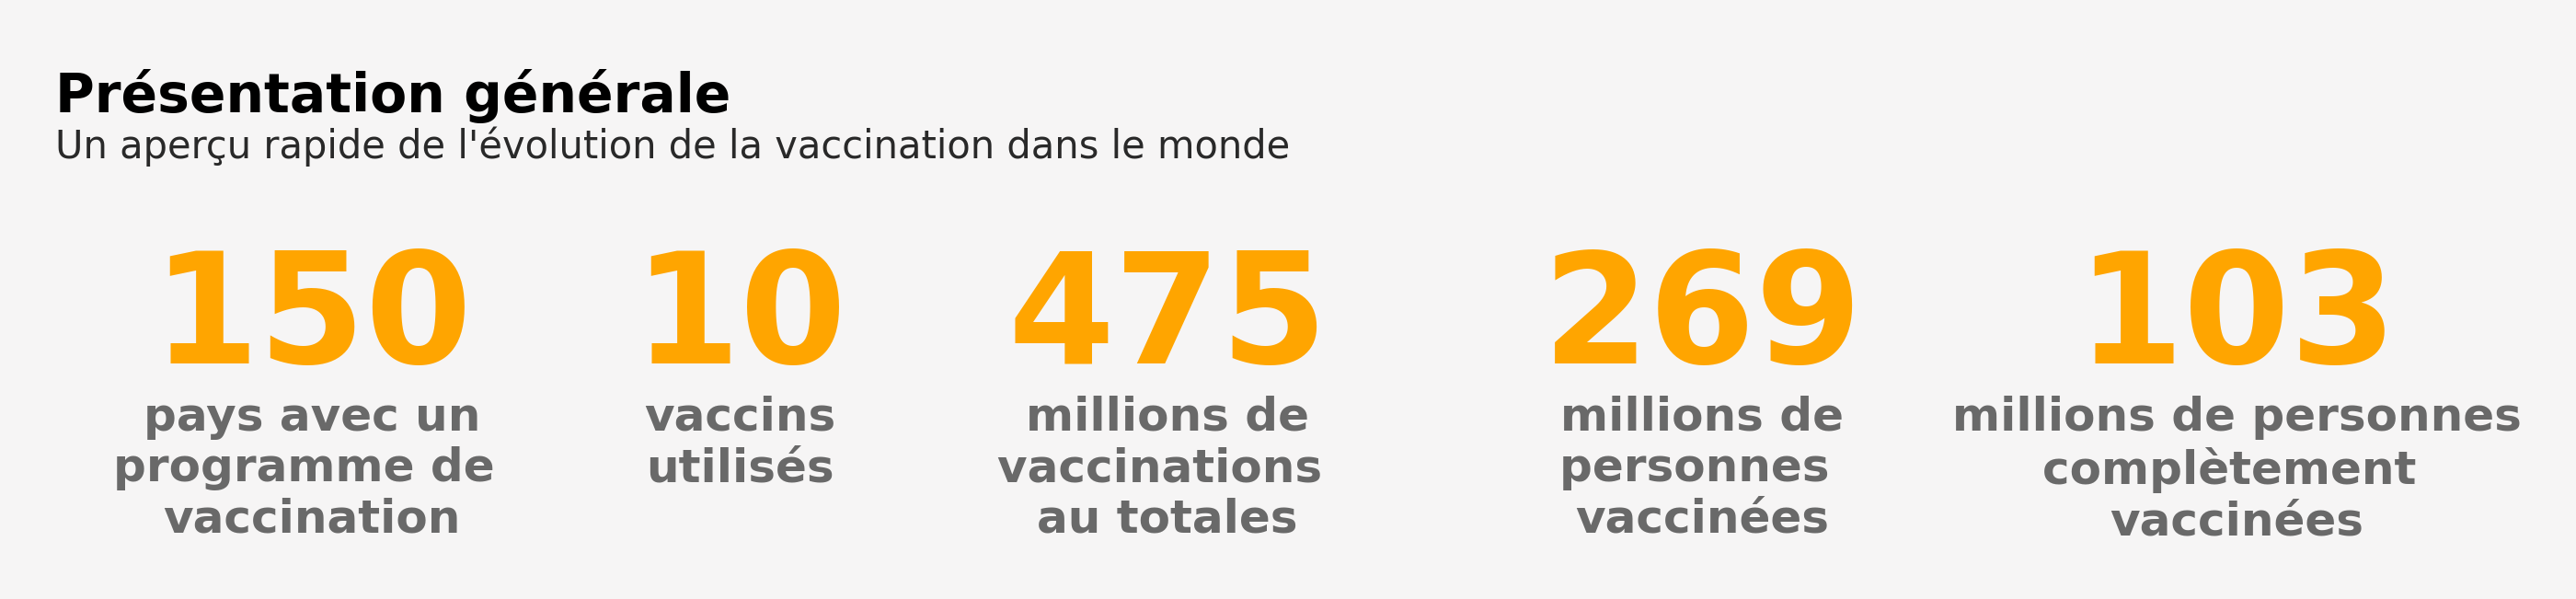

In [ ]:
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(5, 0.8), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)

background_color = "#f6f5f5"

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["top", "right", 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0.text(-0.12, 0.8, 'Présentation générale', color='black', fontsize=7, ha='left', weight='bold', va='bottom')
ax0.text(-0.12, 0.79, 'Un aperçu rapide de l\'évolution de la vaccination dans le monde', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(0, 0, '150', color='#FFA500', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0, 0, 'pays avec un\nprogramme de \nvaccination', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
ax0.text(0.2, 0, '10', color='#FFA500', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.2, 0, 'vaccins\nutilisés', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
ax0.text(0.4, 0, '475', color='#FFA500', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.4, 0, 'millions de\nvaccinations \nau totales', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
ax0.text(0.65, 0, '269', color='#FFA500', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.65, 0, 'millions de\npersonnes \nvaccinées', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
ax0.text(0.9, 0, '103', color='#FFA500', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.9, 0, 'millions de personnes\ncomplètement \nvaccinées', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
plt.show()


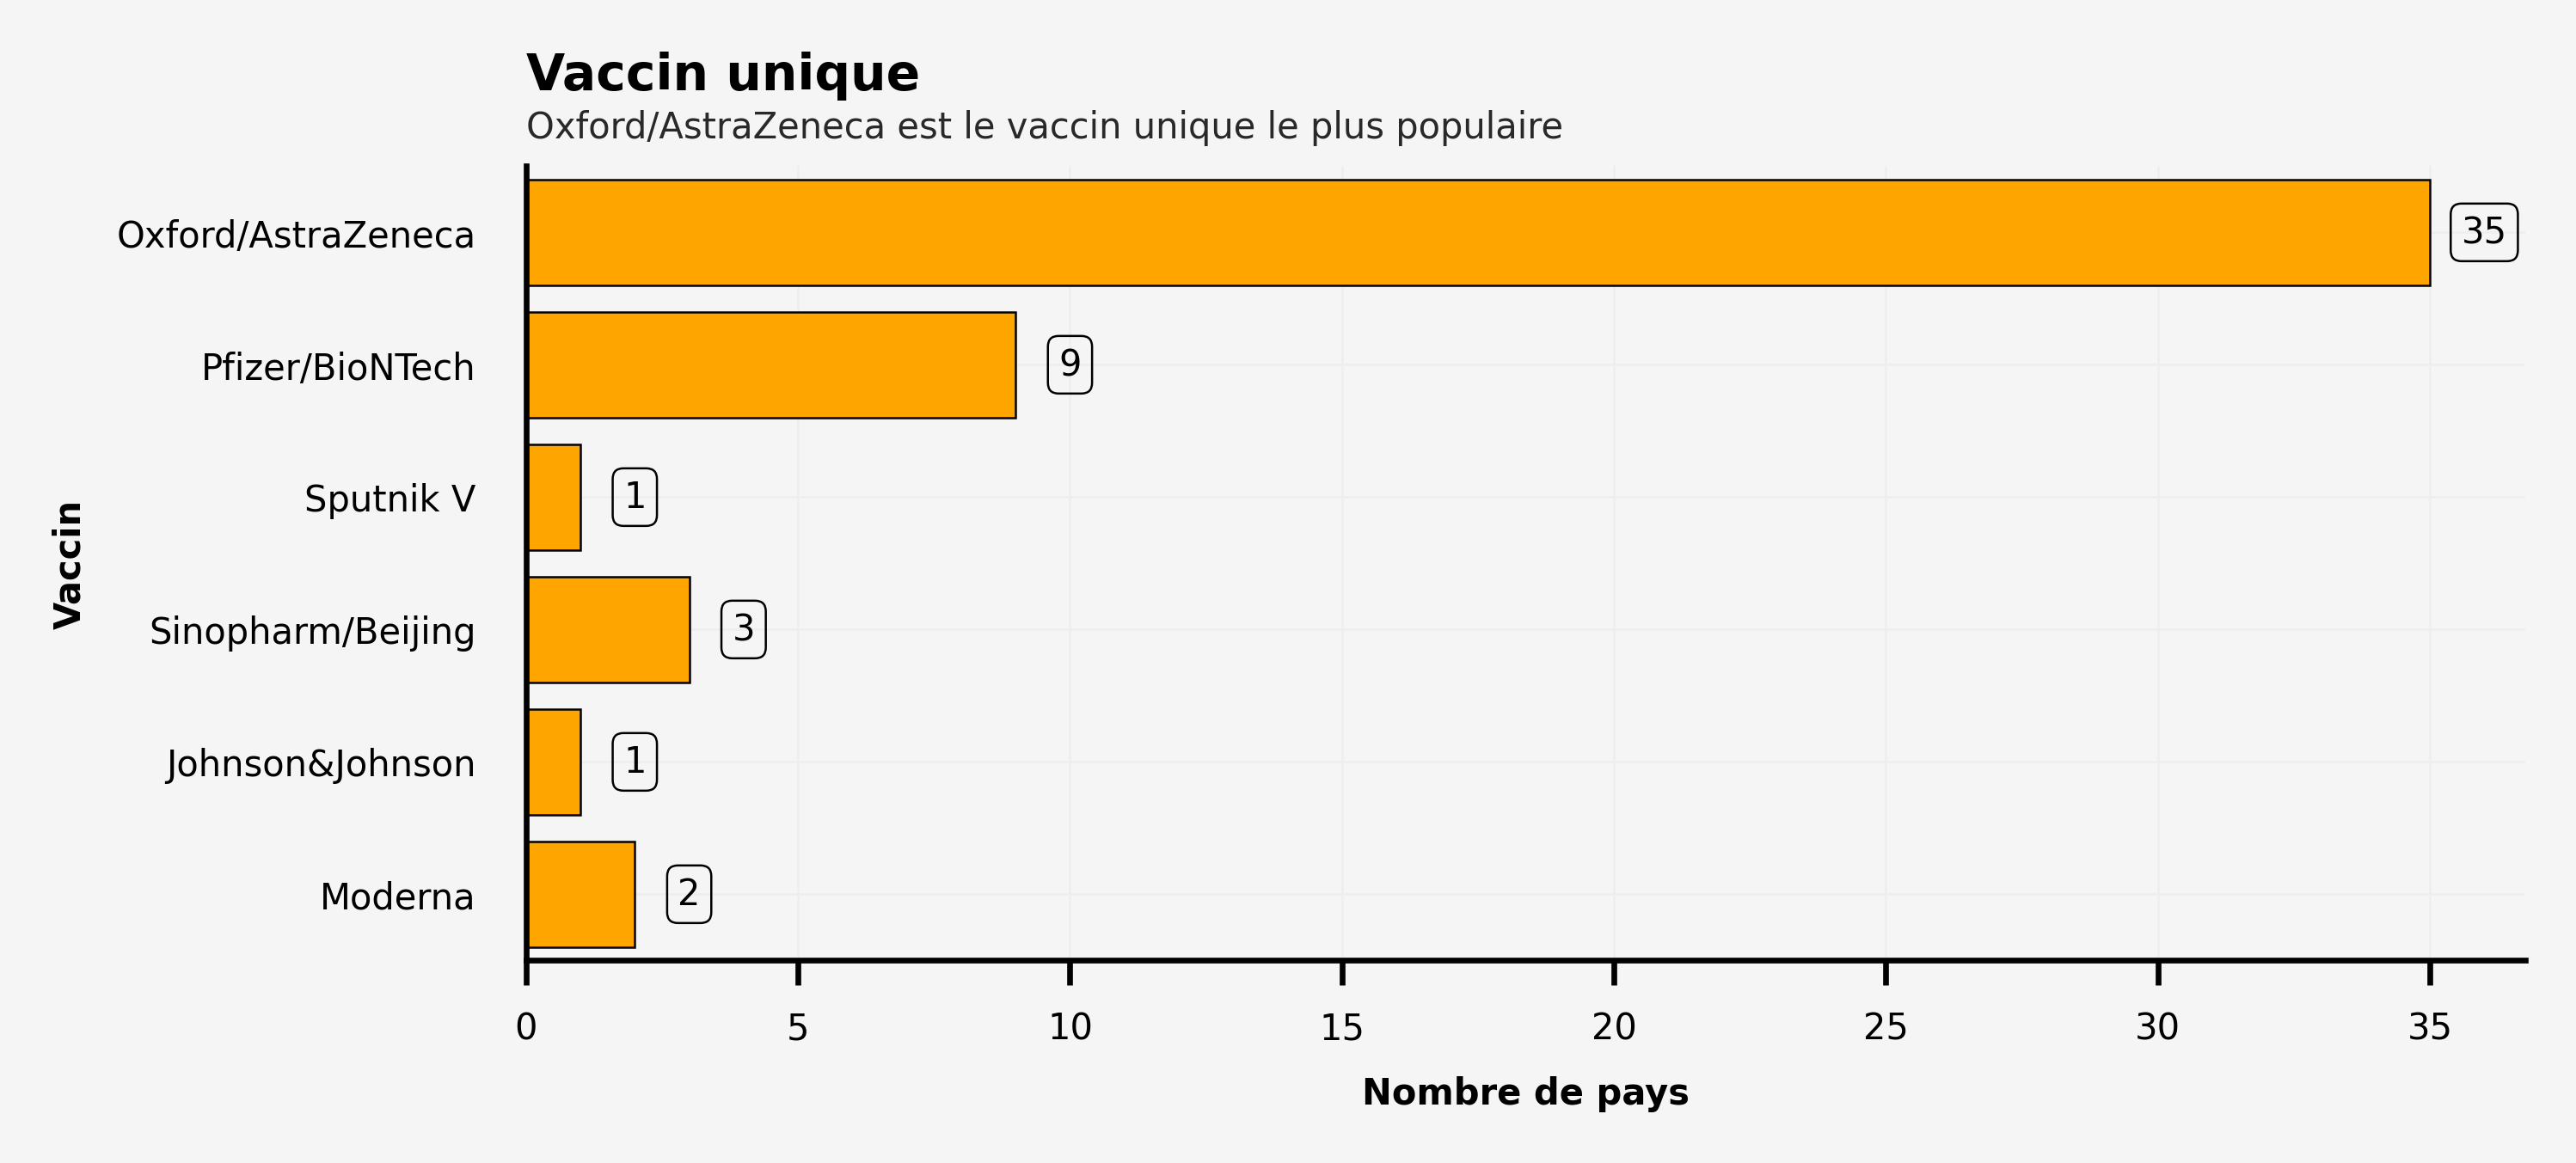

In [ ]:
single_vaccine = data_ld['vaccines'].value_counts()

# Liste des vaccins que vous voulez afficher
vaccines_to_display = ['Oxford/AstraZeneca',
                       'Pfizer/BioNTech',
                       'Sputnik V',
                       'Sinopharm/Beijing',
                       'Sinovac',
                       'Johnson&Johnson',
                       'Moderna']

# Filtrer les vaccins présents dans vos données
vaccines_to_display = [vaccine for vaccine in vaccines_to_display if vaccine in single_vaccine.index]

# Filtrer votre série `single_vaccine` en fonction des vaccins présents
single_vaccine = single_vaccine[vaccines_to_display]

background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(len(vaccines_to_display))]
color_map[0] = "#FFA500"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(0, -1, 'Vaccin unique', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.93, 'Oxford/AstraZeneca est le vaccin unique le plus populaire', color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=single_vaccine.index, x=single_vaccine, zorder=2, orient='h',
                      linewidth=0.3, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("Nombre de pays", fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccin", fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 1
    y = p.get_y() + p.get_height() / 2
    ax0.text(x, y, value, ha='center', va='center', fontsize=5,
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()


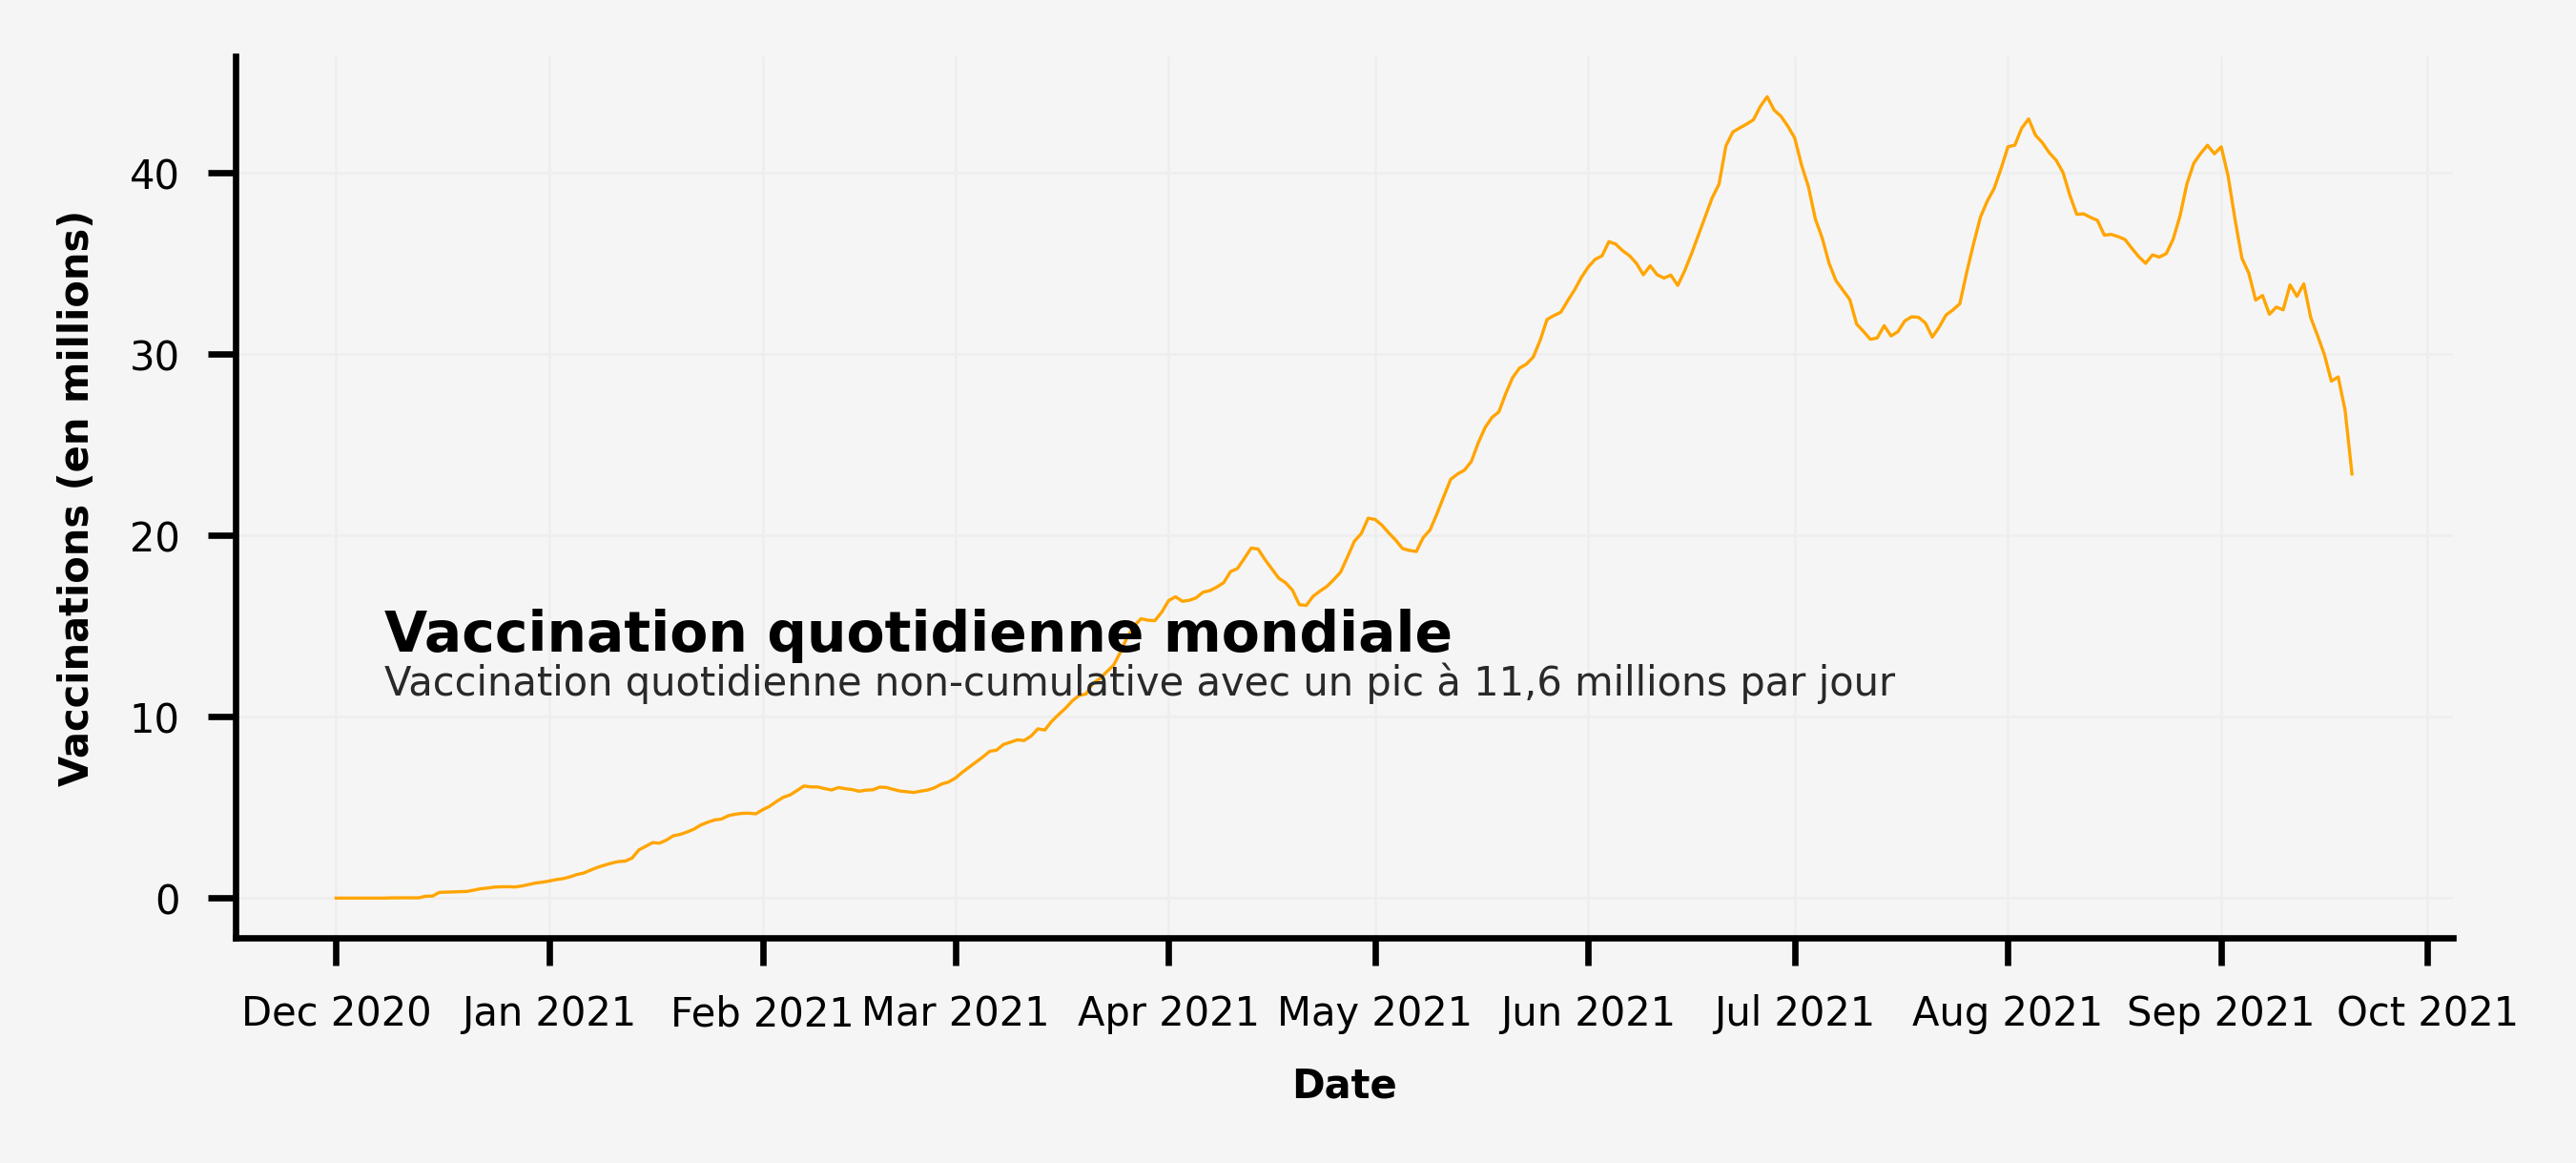

In [ ]:
daily_vaccination = data.groupby('date')['daily_vaccinations'].sum()
daily_vaccination = daily_vaccination / 1000000

background_color = "#f6f5f5"

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%b %Y')

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

# format the ticks
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-8'), 13, 'Vaccination quotidienne mondiale', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-8'), 13, 'Vaccination quotidienne non-cumulative avec un pic à 11,6 millions par jour',
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=daily_vaccination.index, y=daily_vaccination, zorder=2, linewidth=0.4)
ax0_sns.set_xlabel("Date",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (en millions)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

plt.show()

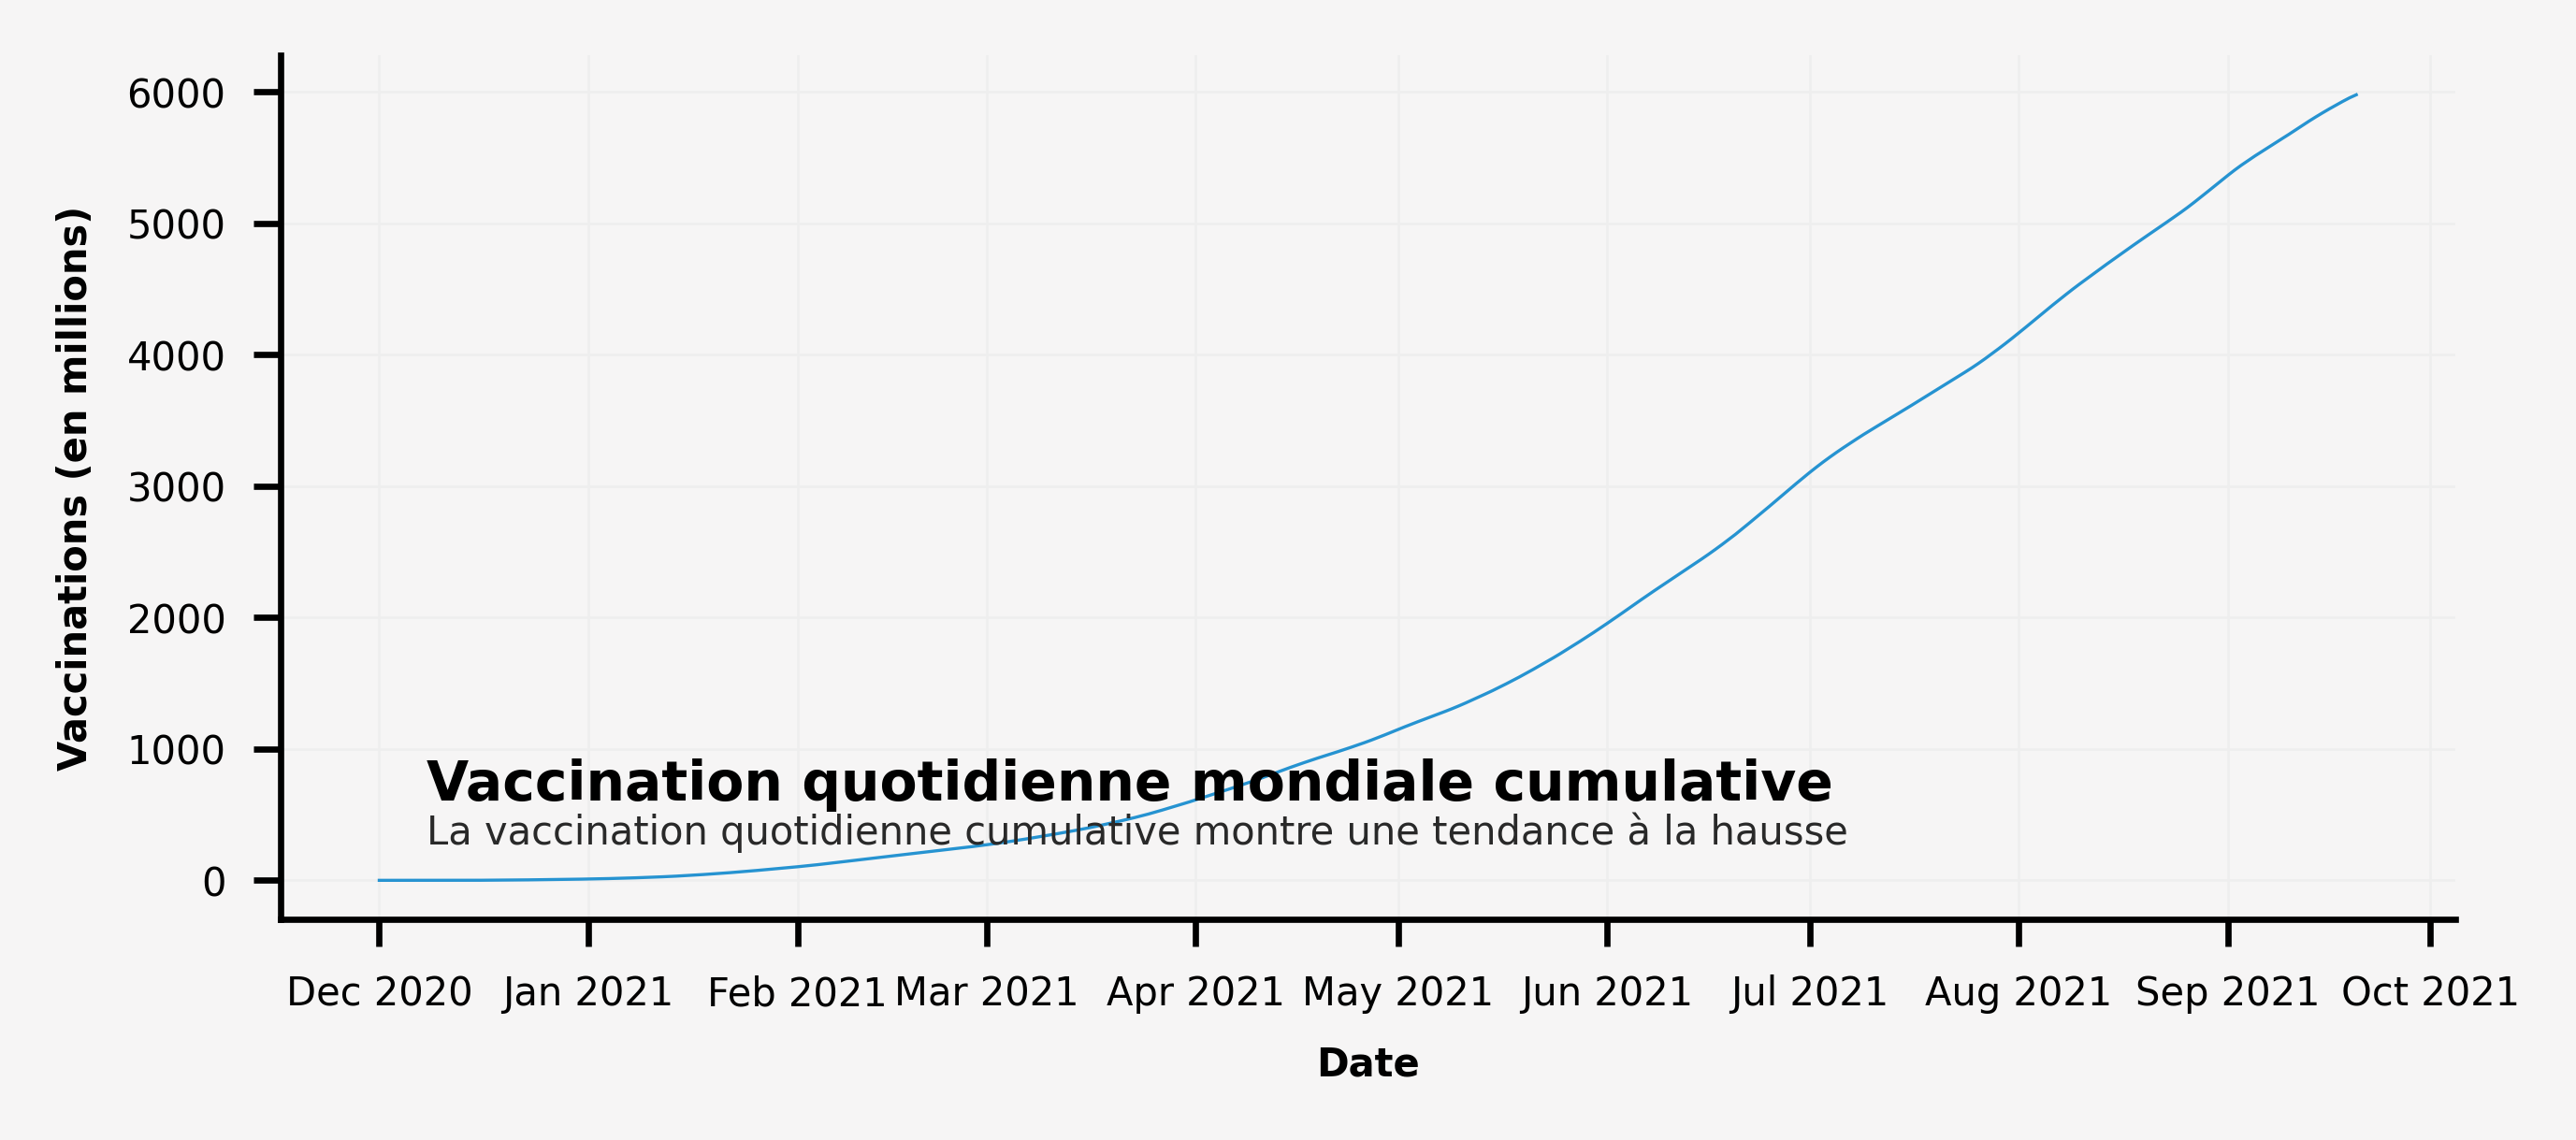

In [ ]:
daily_vaccination = data.groupby('date')['daily_vaccinations'].sum()
daily_vaccination = daily_vaccination / 1000000

background_color = "#f6f5f5"

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%b %Y')

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-8'), 530, 'Vaccination quotidienne mondiale cumulative', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-8'), 525, 'La vaccination quotidienne cumulative montre une tendance à la hausse',
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=daily_vaccination.index, y=daily_vaccination.cumsum(), zorder=2, color='#2693d1', linewidth=0.4)
ax0_sns.set_xlabel("Date",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (en millions)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

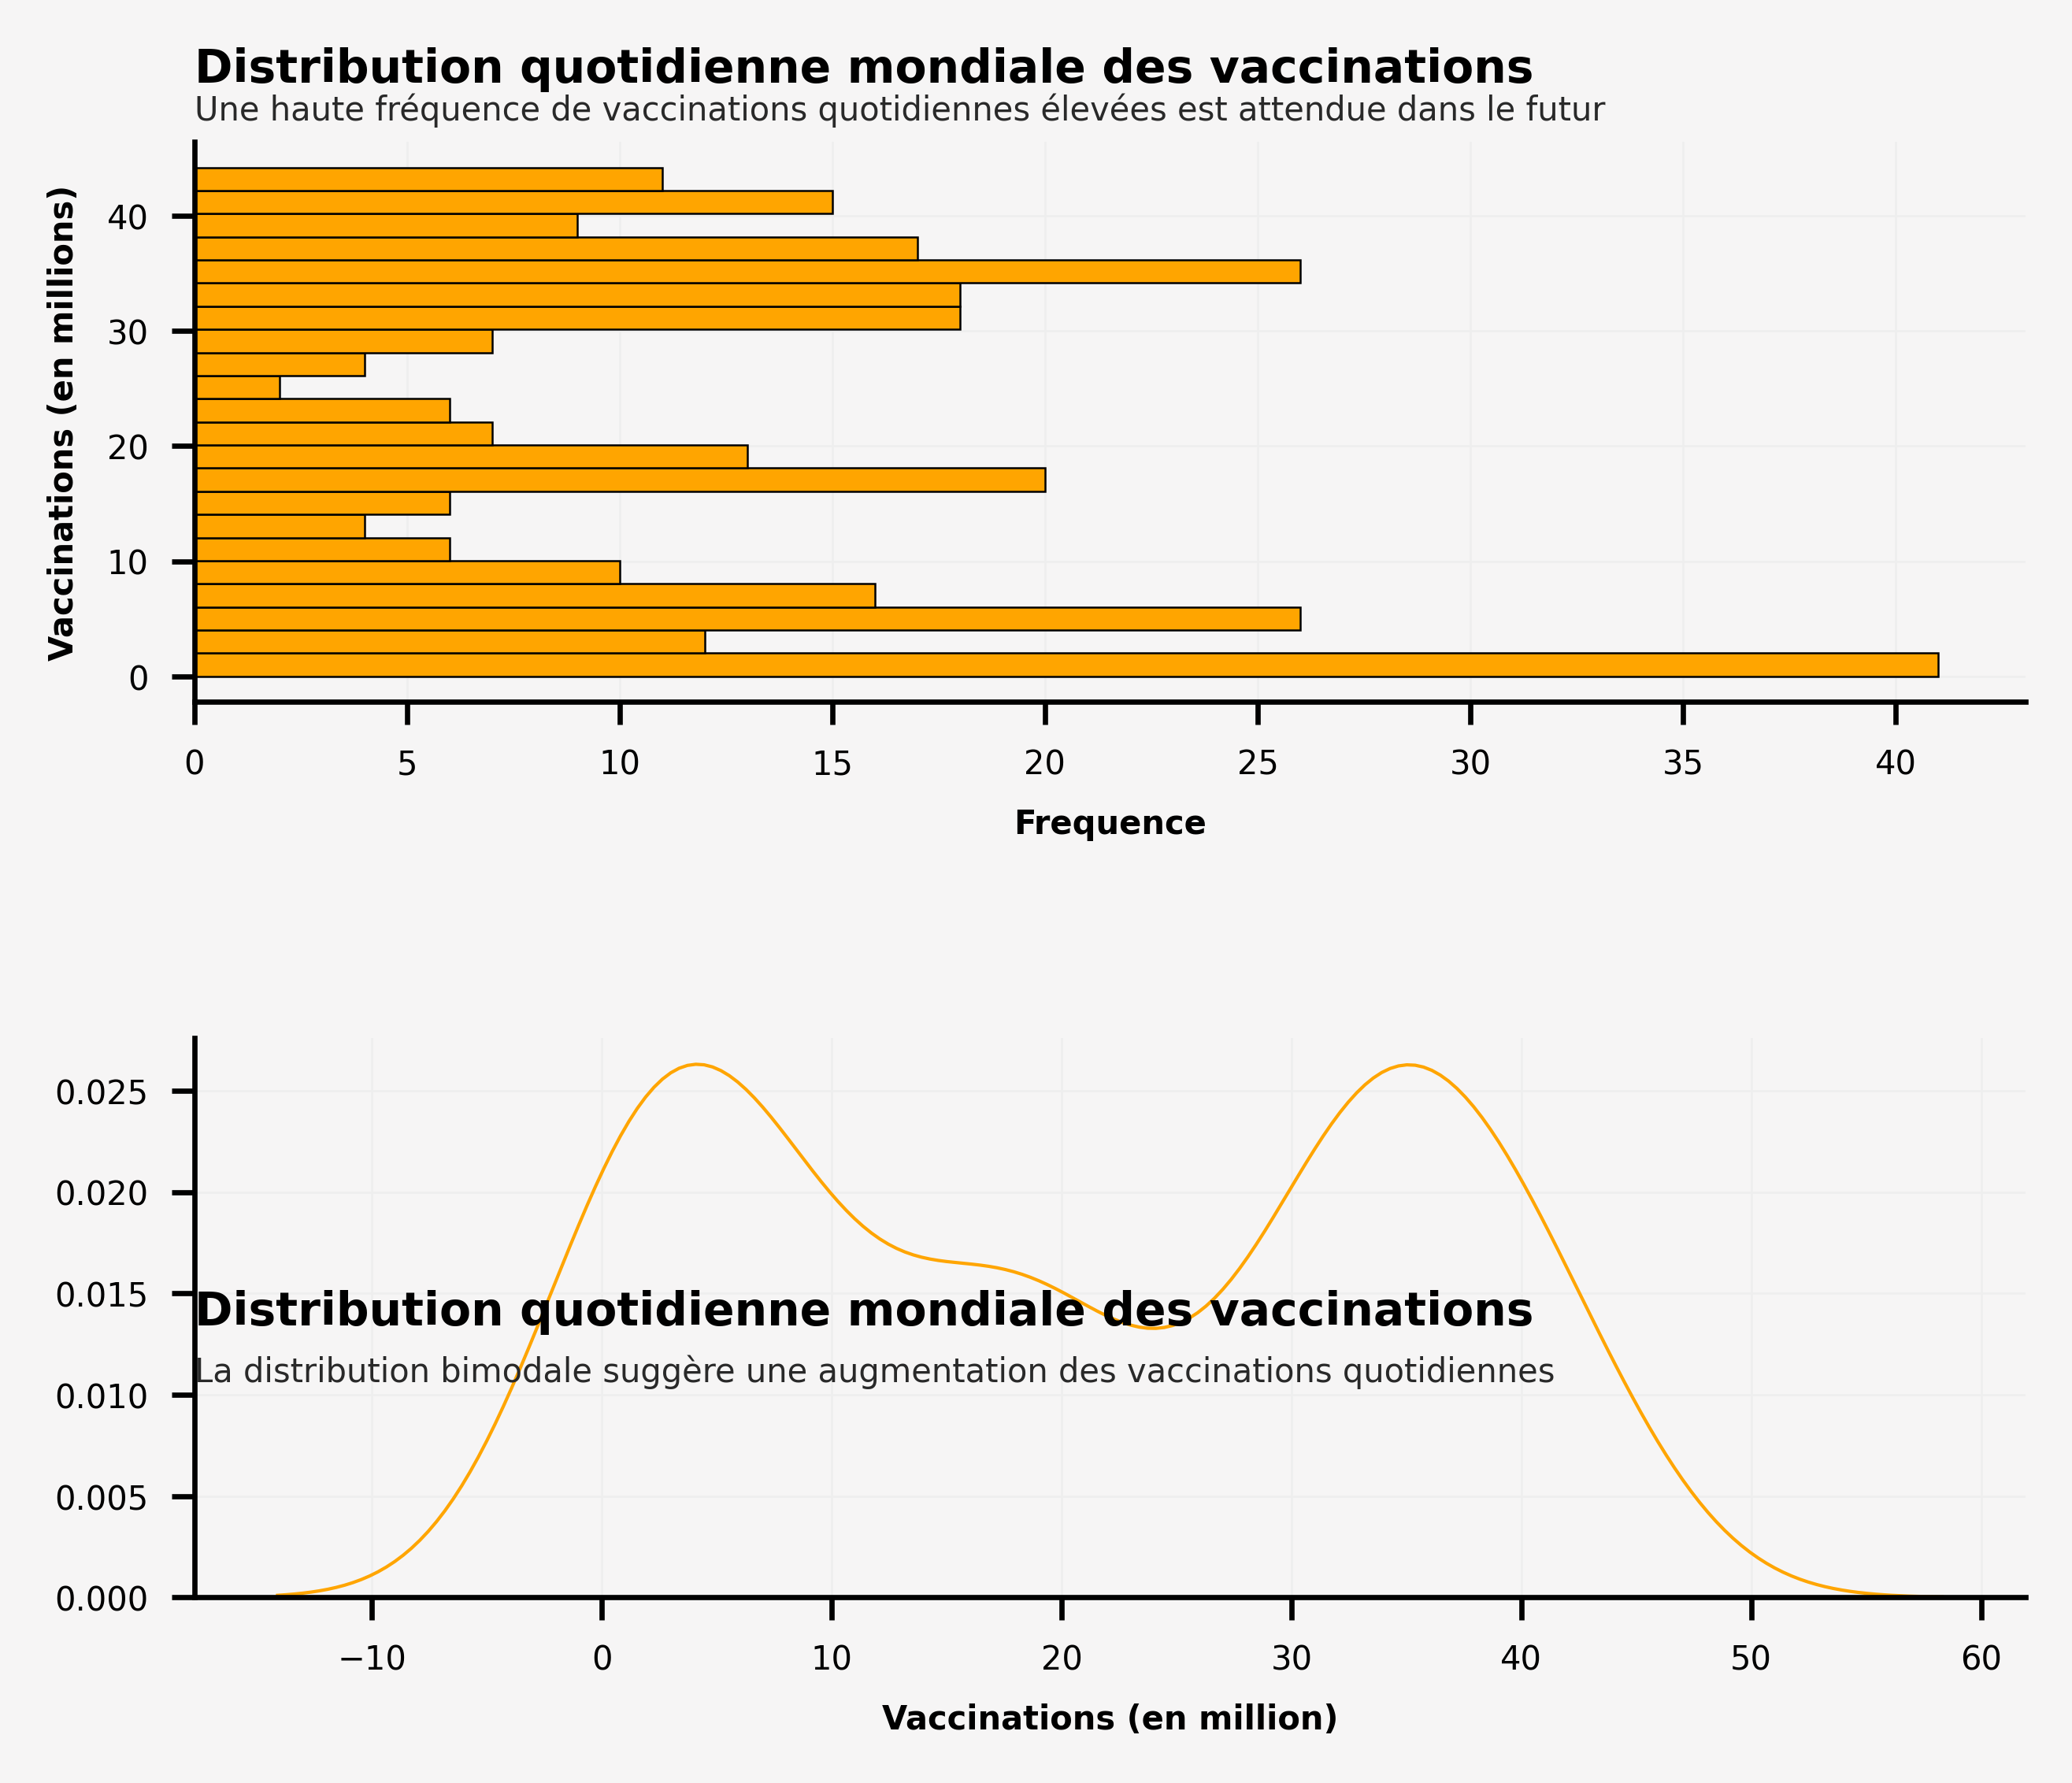

In [ ]:
daily_vaccination = data.groupby('date')['daily_vaccinations'].sum()
daily_vaccination = daily_vaccination / 1000000

background_color = "#f6f5f5"

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 4), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.text(0, 50.8, 'Distribution quotidienne mondiale des vaccinations', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, 50.7, 'Une haute fréquence de vaccinations quotidiennes élevées est attendue dans le futur', color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.histplot(ax=ax0, y=daily_vaccination, zorder=2, binwidth=2, linewidth=0.3, edgecolor='black', alpha=1)
ax0_sns.set_xlabel("Frequence",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (en millions)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0_sns = sns.kdeplot(ax=ax0, x=daily_vaccination, zorder=2, linewidth=0.5, alpha=1)
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, 0.013, 'Distribution quotidienne mondiale des vaccinations', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(x0, 0.012, 'La distribution bimodale suggère une augmentation des vaccinations quotidiennes', color='#292929', fontsize=5, ha='left', va='top')

ax0_sns.set_xlabel("Vaccinations (en million)",fontsize=5, weight='bold')
ax0_sns.set_ylabel("",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

plt.show()

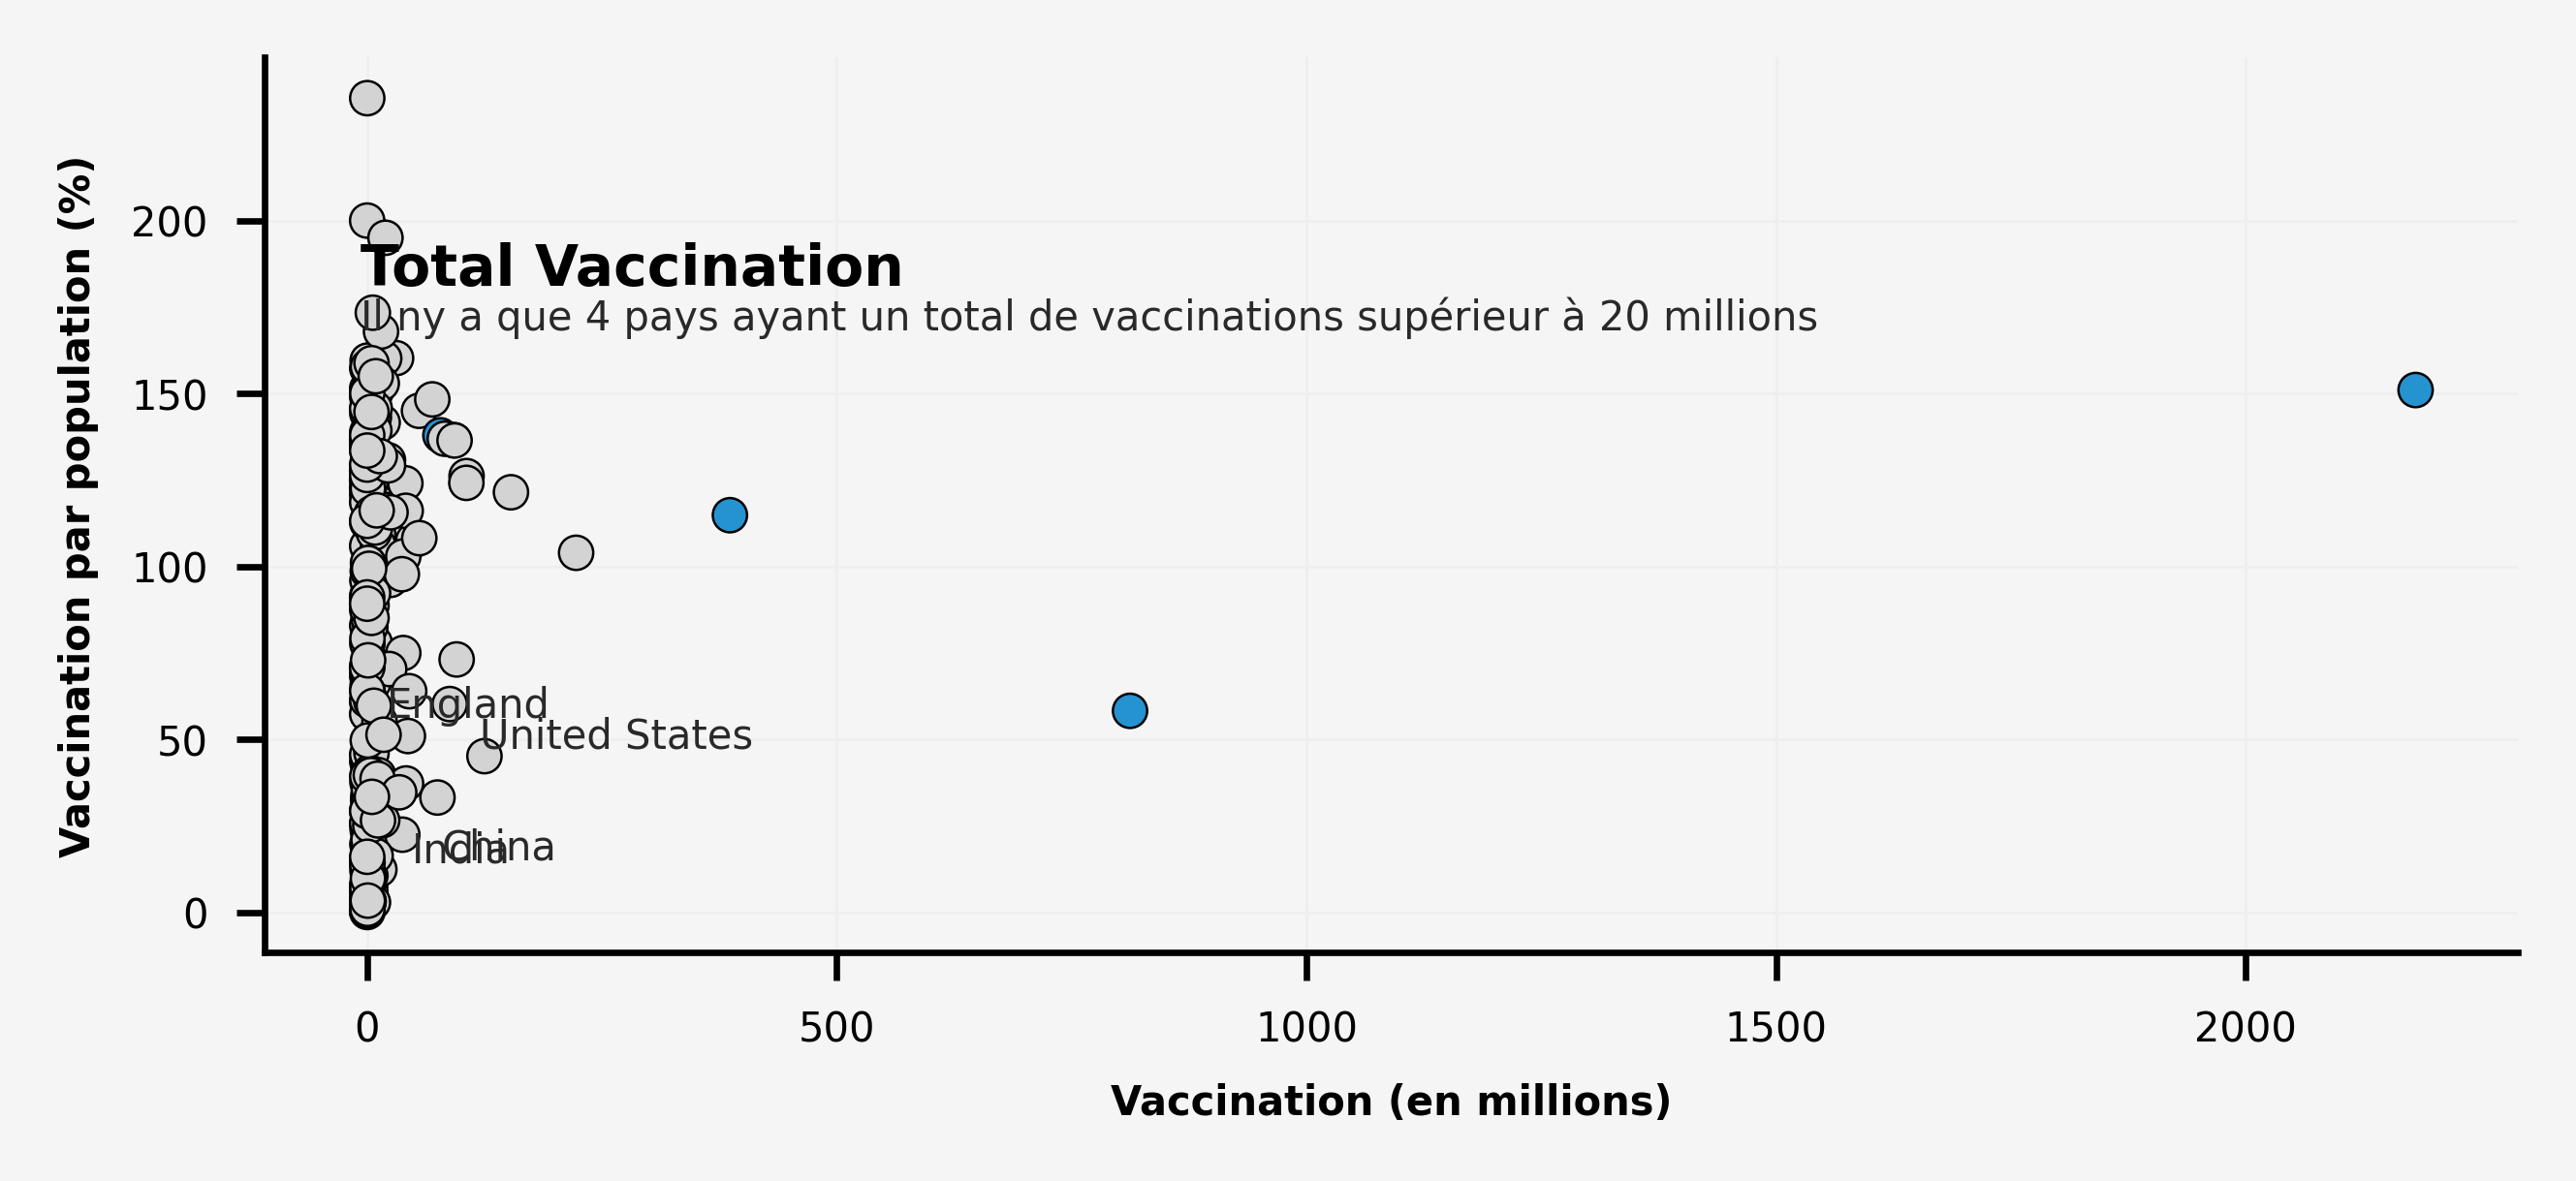

In [ ]:
background_color = "#f6f5f5"

color_map = ["lightgray" for _ in range(2)]
color_map[1] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))
value_list = ['United States', 'England', 'India', 'China']
boolean_series = data_ld.country.isin(value_list)
data_ld['color'] = boolean_series

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.text(-7, 178, 'Total Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-7, 178, 'Il n''y a que 4 pays ayant un total de vaccinations supérieur à 20 millions', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(120, 45, 'United States', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(79, 13, 'China', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(48, 12, 'India', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(21, 54, 'England', color='#292929', fontsize=5, ha='left', va='bottom')
ax0_sns = sns.scatterplot(ax=ax0, y=data_ld['total_vaccinations_per_hundred'], x=data_ld['total_vaccinations']/1000000,
                          zorder=2, linewidth=0.3, edgecolor='black',  hue=data_ld['color'], legend=False, size=1)
ax0_sns.set_xlabel("Vaccination (en millions)",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccination par population (%)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

plt.show()

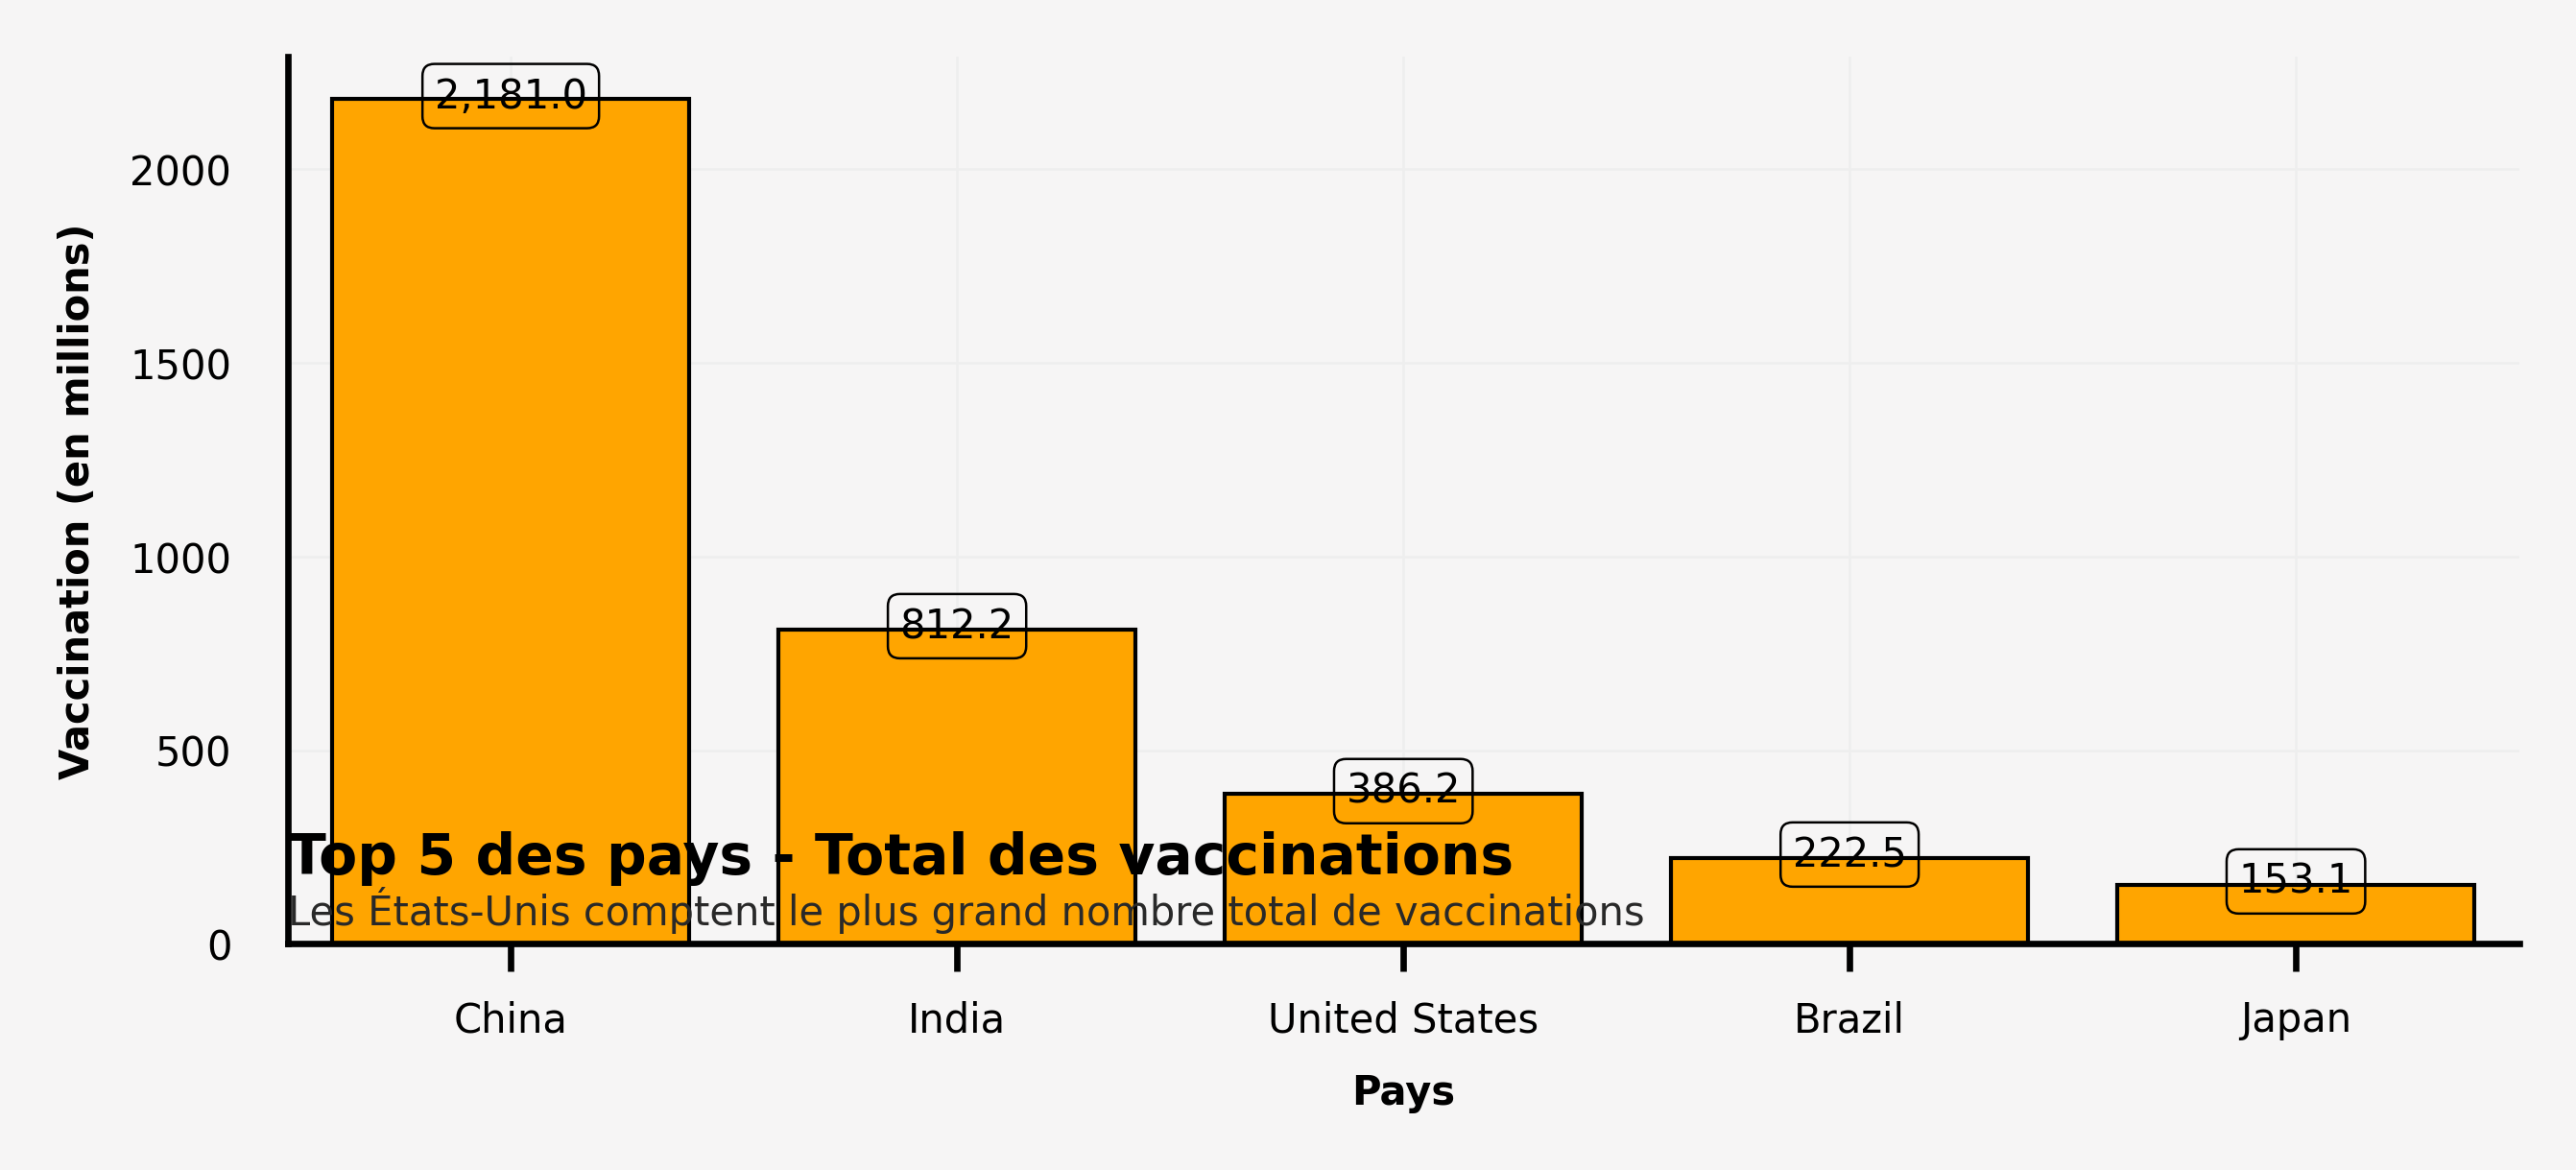

In [ ]:
top5_countries_total_vaccination = data_ld.sort_values('total_vaccinations', ascending=False)
top5_countries_total_vaccination = top5_countries_total_vaccination[:5]
top5_countries_total_vaccination

background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(5)]
color_map[0] = "#FFA500"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-0.5, 150, 'Top 5 des pays - Total des vaccinations', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, 149, 'Les États-Unis comptent le plus grand nombre total de vaccinations',
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_total_vaccination['country'],
                      y=top5_countries_total_vaccination['total_vaccinations']/1000000, zorder=2,
                      linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("Pays",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccination (en millions)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_height():,.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 8
    ax0.text(x, y, value, ha='center', va='center', fontsize=5,
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

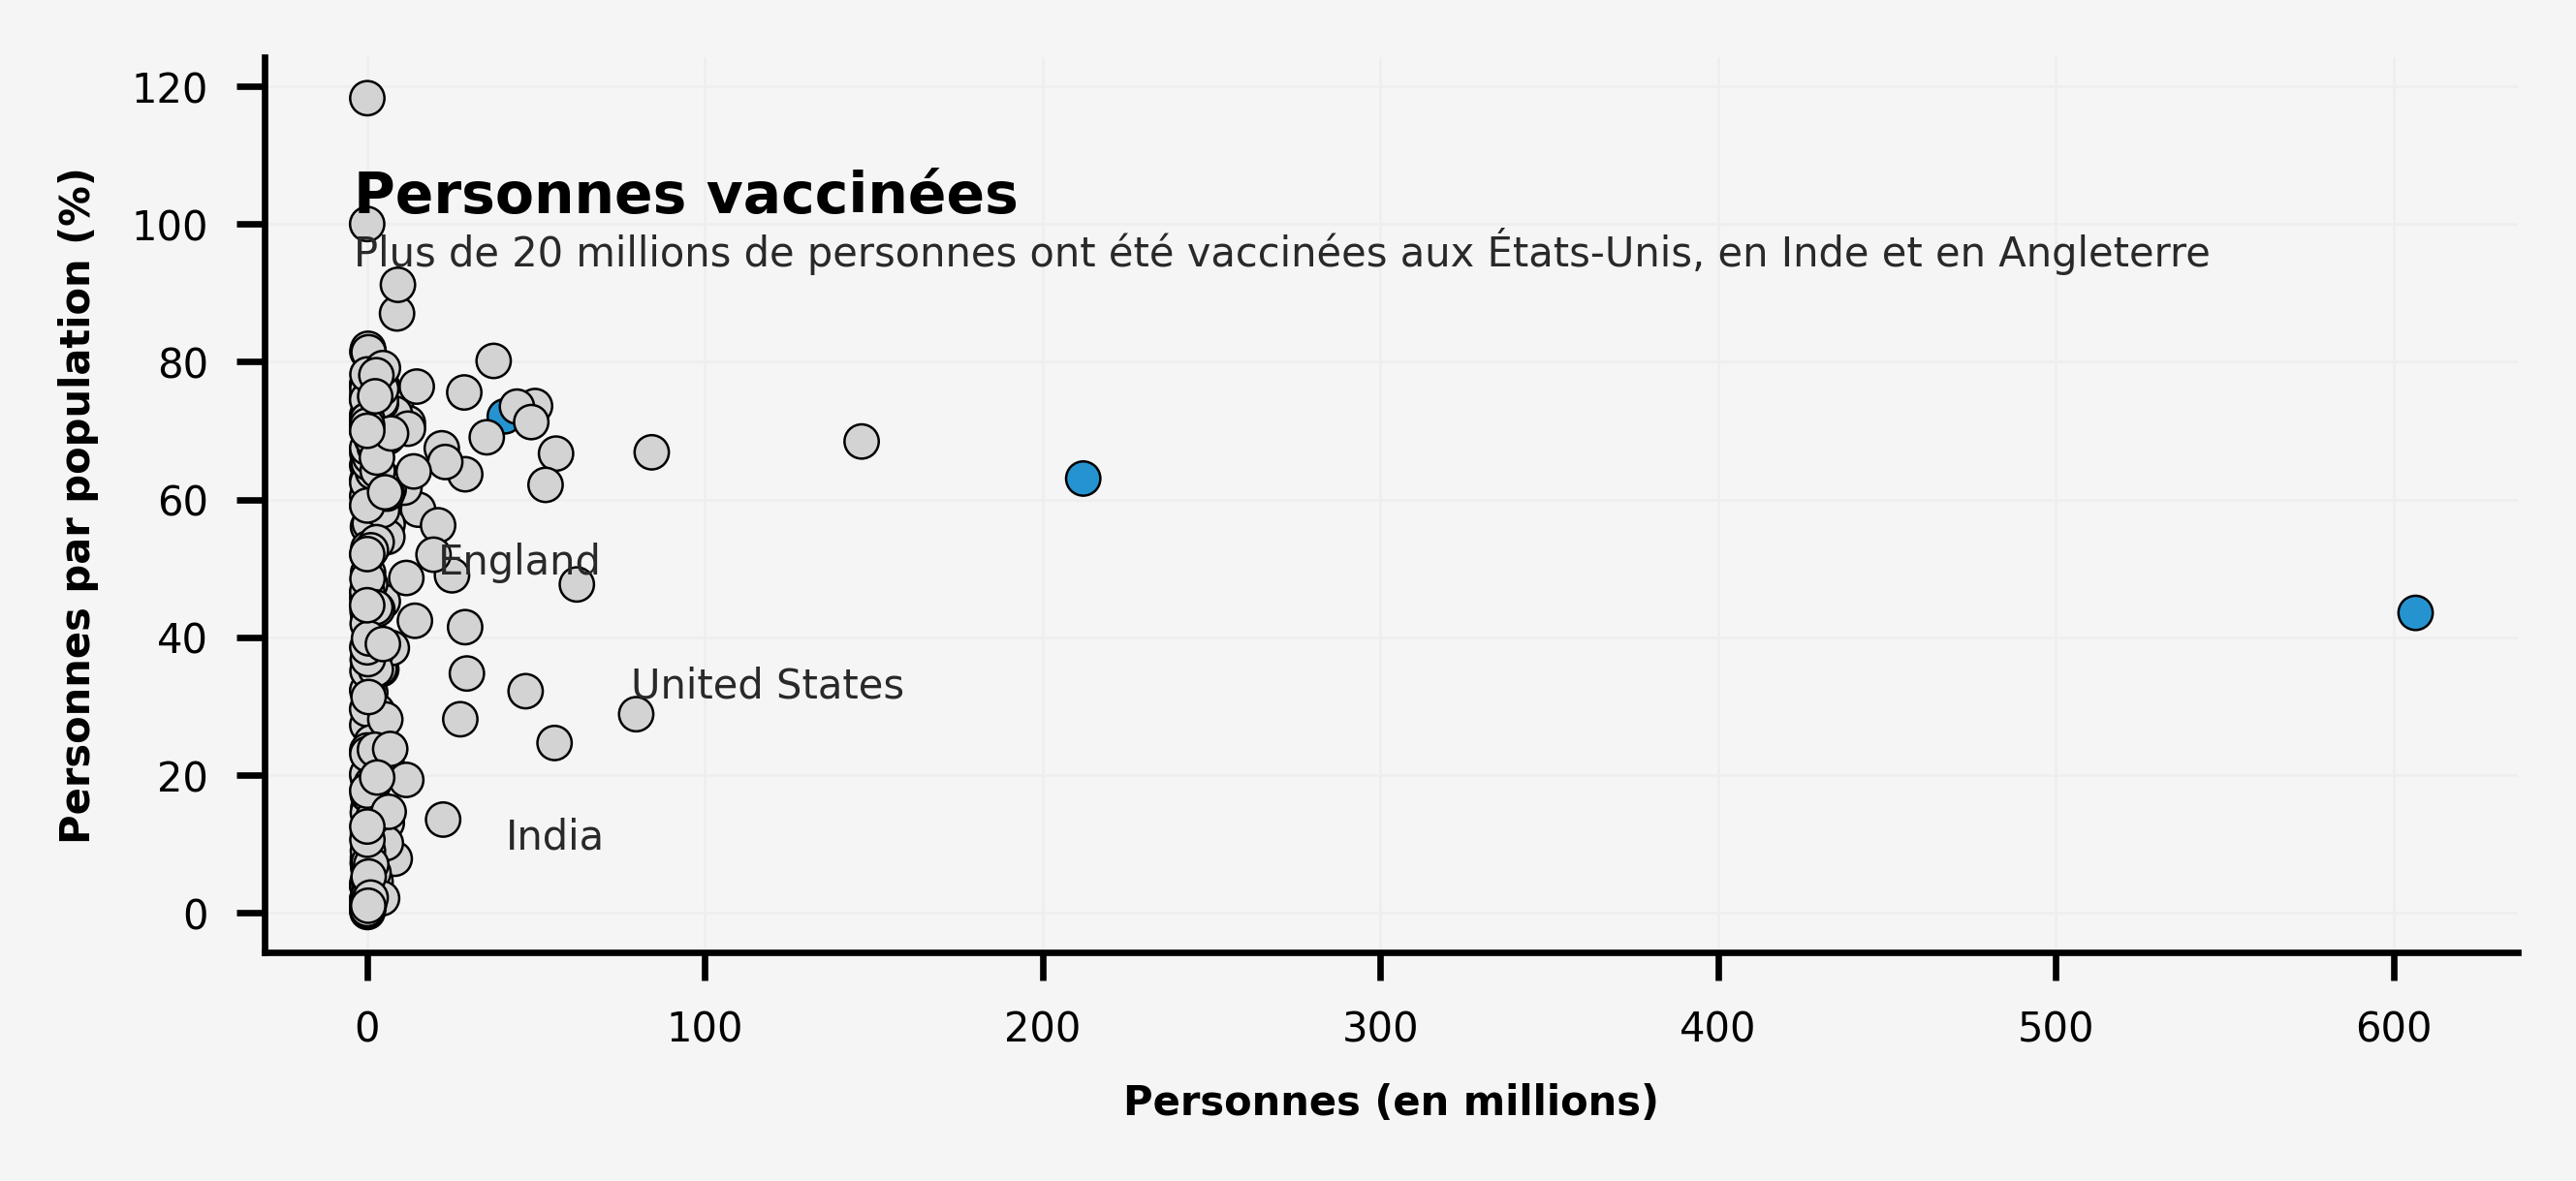

In [ ]:
background_color = "#f6f5f5"

color_map = ["lightgray" for _ in range(2)]
color_map[1] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))
value_list = ['United States', 'England', 'India']
boolean_series = data_ld.country.isin(value_list)
data_ld['color'] = boolean_series

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.text(-4, 100, 'Personnes vaccinées', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-4, 99.6, 'Plus de 20 millions de personnes ont été vaccinées aux États-Unis, en Inde et en Angleterre', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(78, 30, 'United States', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(41, 8, 'India', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(21, 48, 'England', color='#292929', fontsize=5, ha='left', va='bottom')
ax0_sns = sns.scatterplot(ax=ax0, y=data_ld['people_vaccinated_per_hundred'], x=data_ld['people_vaccinated']/1000000,
                          zorder=2, linewidth=0.3, edgecolor='black', hue=data_ld['color'], legend=False, size=1)
ax0_sns.set_xlabel("Personnes (en millions)",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Personnes par population (%)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

plt.show()

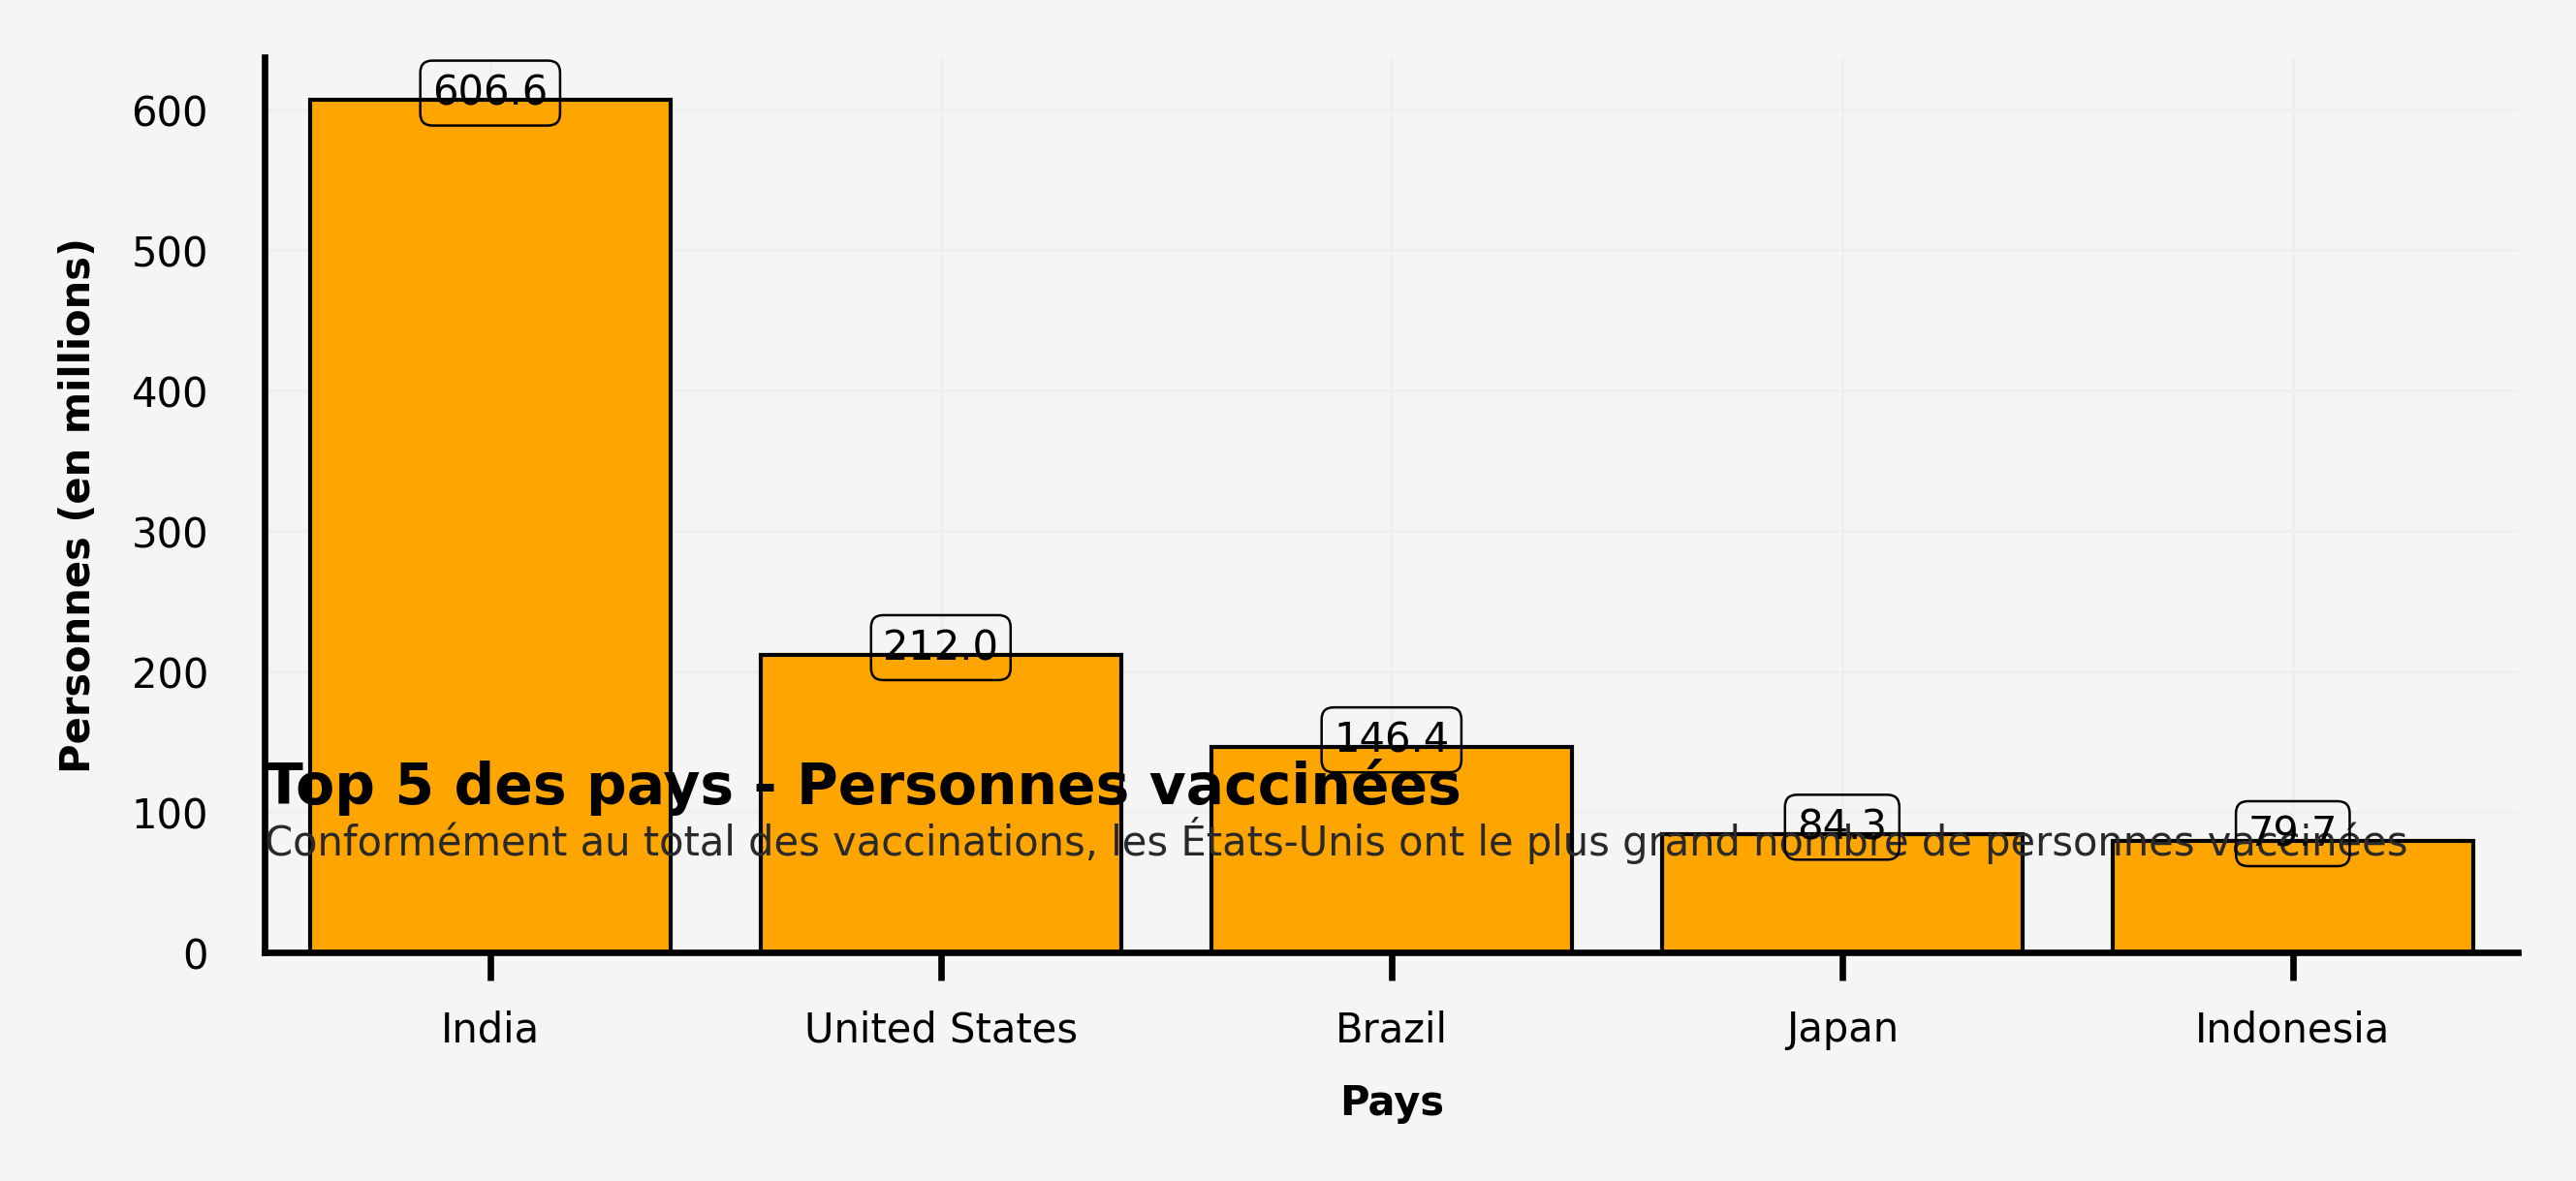

In [ ]:
top5_countries_vaccinated = data_ld.sort_values('people_vaccinated', ascending=False)
top5_countries_vaccinated = top5_countries_vaccinated[:5]
top5_countries_vaccinated

background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(5)]
color_map[0] = "#FFA500"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-0.5, 98, 'Top 5 des pays - Personnes vaccinées', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, 97, 'Conformément au total des vaccinations, les États-Unis ont le plus grand nombre de personnes vaccinées',
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_vaccinated['country'], y=top5_countries_vaccinated['people_vaccinated']/1000000,
                      zorder=2, linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("Pays",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Personnes (en millions)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_height():,.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 5
    ax0.text(x, y, value, ha='center', va='center', fontsize=5,
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()